In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

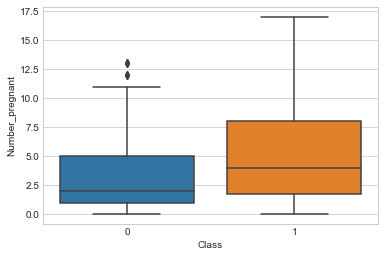

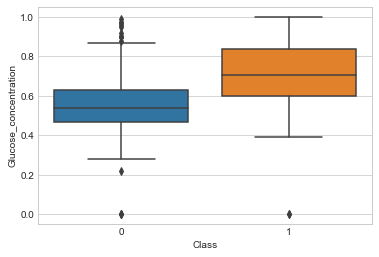

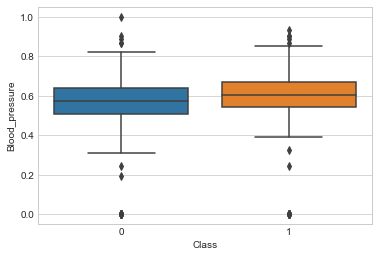

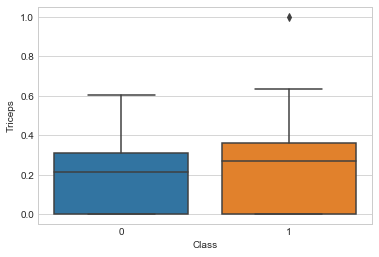

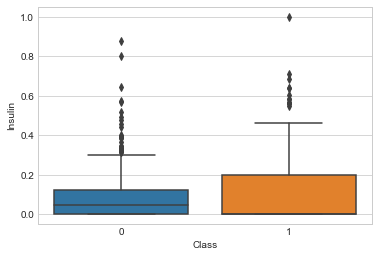

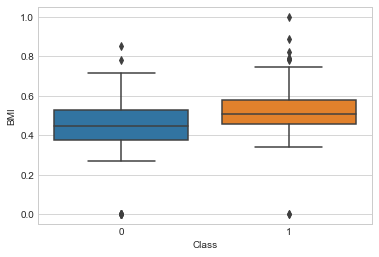

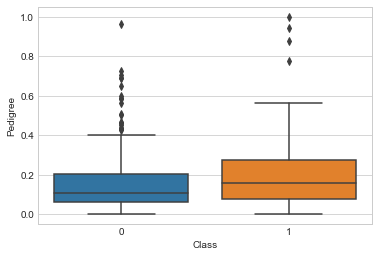

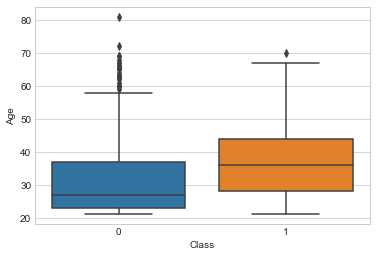

In [5]:
def plot_box(data, cols, col_x = 'Class'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age']
plot_box(data, num_cols)

In [6]:
X=data[num_cols]
y=data['Class']

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age
464,10,0.577889,0.803279,0.000000,0.000000,0.357675,0.403074,34
223,7,0.713568,0.491803,0.333333,0.224586,0.429210,0.260034,61
393,4,0.582915,0.590164,0.121212,0.102837,0.329359,0.164389,37
766,1,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47
570,3,0.391960,0.573770,0.000000,0.000000,0.484352,0.081981,39


In [10]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']
X_train[cols_to_norm] = X_train[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age
464,0.588235,0.577889,0.803279,0.000000,0.000000,0.357675,0.403074,34
223,0.411765,0.713568,0.491803,0.523810,0.224586,0.429210,0.260034,61
393,0.235294,0.582915,0.590164,0.190476,0.102837,0.329359,0.164389,37
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47
570,0.176471,0.391960,0.573770,0.000000,0.000000,0.484352,0.081981,39


In [12]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'max_depth': np.arange(1, 10),
                     'criterion':['entropy','gini']}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [15]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7283464566929134
0.6424870466321244


In [ ]:
from sklearn.tree import export_graphviz
tree_dot = export_graphviz(
tree,
out_file=None, # or out_file="iris_tree.dot"
feature_names=num_cols,
class_names='Class',
rounded=True,
filled=True
)
print(tree_dot)

In [18]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.48031496062992124

In [19]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7165354330708661

In [20]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6929133858267716

In [18]:
tree.score(X_train,y_train)

0.8249027237354085

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X_train, y_train)

10